## Quickstart

[![Open In Colab](https://img.shields.io/badge/Open%20In-Colab-blue?style=for-the-badge&logo=google-colab)](https://colab.research.google.com/github/dnth/x.infer/blob/main/nbs/quickstart.ipynb)
[![Open In Kaggle](https://img.shields.io/badge/Open%20In-Kaggle-blue?style=for-the-badge&logo=kaggle)](https://kaggle.com/kernels/welcome?src=https://github.com/dnth/x.infer/blob/main/nbs/quickstart.ipynb)

This notebook shows how to get started with using x.infer.

x.infer relies on PyTorch and torchvision, so make sure you have it installed on your system. Uncomment the following line to install it.

In [ ]:
# !pip install -Uqq torch torchvision

Let's check if PyTorch is installed by checking the version.

In [1]:
import torch

torch.__version__

'2.4.0+cu121'

Also let's check if CUDA is available.

In [2]:
torch.cuda.is_available()

True

x.infer relies on various optional dependencies like transformers, ultralytics, timm, etc.
You don't need to install these dependencies if you don't want to. Just install x.infer with the dependencies you want.

For example, if you'd like to use models from the transformers library, you can install the `transformers` extra - `pip install -Uqq "xinfer[transformers]"`

To install all the dependencies, you can run `!pip install -Uqq "xinfer[all]"`

For this example, we'll install all the dependencies.

In [ ]:
!pip install -qq "xinfer[all]"

Alternatively, if you'd like to install the bleeding edge version of x.infer, uncomment the following line.

In [ ]:
# !pip install "git+https://github.com/dnth/x.infer.git#egg=xinfer[all]"

It's recommended to restart the kernel once all the dependencies are installed.

In [ ]:
from IPython import get_ipython
get_ipython().kernel.do_shutdown(restart=True)

Once completed, let's import x.infer, check the version and list all the models available. Specifying `interactive=True` will launch an interactive table in Jupyter Notebooks.

In [3]:
import xinfer

print(xinfer.__version__)

0.2.0


2024-11-01 17:27:06.295 | INFO     | xinfer.core:list_models:55 - Showing interactive table in Jupyter Notebook. Type in the search bar to filter the models.



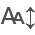

Implementation                                         Model ID  \
0              timm                     timm/bat_resnext26ts.ch_in1k   
1              timm   timm/beit_base_patch16_224.in22k_ft_in22k_in1k   
2              timm   timm/beit_base_patch16_384.in22k_ft_in22k_in1k   
3              timm  timm/beit_large_patch16_224.in22k_ft_in22k_in1k   
4              timm  timm/beit_large_patch16_384.in22k_ft_in22k_in1k   
...             ...                                              ...   
1291           vllm                     vllm/allenai/Molmo-7B-D-0924   
1292           vllm                     vllm/allenai/Molmo-7B-O-0924   
1293           vllm                      vllm/allenai/Molmo-72B-0924   
1294           vllm           vllm/microsoft/Phi-3.5-vision-instruct   
1295           vllm        vllm/microsoft/Phi-3-vision-128k-instruct   

          Input --> Output  
0     image --> categories  
1     image --> categories  
2     image --> categories  
3     image --> categories  
4     image --> categories  
...                    ...  
1291   image-text --> text  
1292   image-text --> text  
1293   image-text --> text  
1294   image-text --> text  
1295   image-text --> text  

[1296 rows x 3 columns]

In [4]:
xinfer.list_models(interactive=True)

If you'd like to search for a specific model, you can do so by passing in the `search` parameter.

In [5]:
xinfer.list_models(search="moondream")

                       Available Models                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Implementation ┃ Model ID            ┃ Input --> Output    ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ transformers   │ vikhyatk/moondream2 │ image-text --> text │
└────────────────┴─────────────────────┴─────────────────────┘

You can pick any model from the list of models available.
Let's create a model from the `vikhyatk/moondream2` model. We can optionally specify the device and dtype. By default, the model is created on the CPU and the dtype is `float32`.

Since we have GPU available, let's create the model on the GPU and use `float16` precision.

In [6]:
model = xinfer.create_model("vikhyatk/moondream2", device="cuda", dtype="float16")

2024-11-01 17:27:10.824 | INFO     | xinfer.models:__init__:63 - Model: vikhyatk/moondream2
2024-11-01 17:27:10.825 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-01 17:27:10.826 | INFO     | xinfer.models:__init__:65 - Dtype: float16
PhiForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owne

Now that we have the model, let's infer an image.

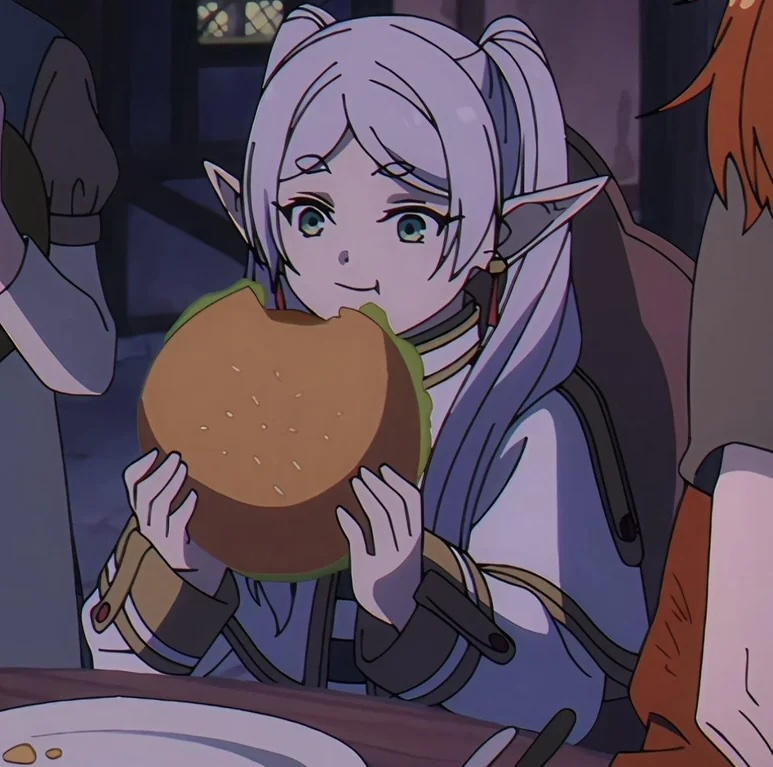

In [7]:
from PIL import Image
import requests

image_url = "https://raw.githubusercontent.com/vikhyat/moondream/main/assets/demo-1.jpg"
Image.open(requests.get(image_url, stream=True).raw)


You can pass in a url or the path to an image file.

In [8]:
image = "https://raw.githubusercontent.com/vikhyat/moondream/main/assets/demo-1.jpg"
prompt = "Caption this image."

model.infer(image, prompt)

'An anime-style illustration depicts a young girl with white hair and green eyes, wearing a white jacket and holding a large burger, seated at a table with a plate of food in front of her.'

If you'd like to generate a longer caption, you can do so by setting the `max_new_tokens` parameter. You can also pass in any generation parameters supported by the `transformers` library.

In [9]:
image = "https://raw.githubusercontent.com/vikhyat/moondream/main/assets/demo-1.jpg"
prompt = "Caption this image highlighting the focus of the image and the background in detail."

model.infer(image, prompt, max_new_tokens=500)

'The image depicts a young girl with long, white hair and blue eyes sitting at a table, holding a large burger in her hands. The background shows a dimly lit room with a window, suggesting an indoor setting.'

If you'd like to see the inference stats, you can do so by calling the `print_stats` method. This might be useful if you're running some sort of benchmark on the inference time.

In [10]:
model.print_stats()

                    Model Info                     
╭───────────────────────────┬─────────────────────╮
│ Attribute                 │ Value               │
├───────────────────────────┼─────────────────────┤
│ Model ID                  │ vikhyatk/moondream2 │
│ Device                    │ cuda                │
│ Dtype                     │ torch.float16       │
│ Number of Inferences      │ 2                   │
│ Total Inference Time (ms) │ 2055.9137           │
│ Average Latency (ms)      │ 1027.9569           │
╰───────────────────────────┴─────────────────────╯

Finally, you can also run batch inference. You'll have to pass in a list of images and prompts.

In [11]:
model.infer_batch([image, image], [prompt, prompt])

['The image depicts a young girl with long, white hair and blue eyes sitting at a table, holding a large burger in her hands. The background shows a cozy indoor setting with a window and a chair visible.',
 'The image depicts a young girl with long, white hair and blue eyes sitting at a table, holding a large burger in her hands. The background shows a cozy indoor setting with a window and a chair visible.']

For convenience, you can also launch a Gradio interface to interact with the model.

In [12]:
model.launch_gradio()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Finally, you can also launch a Gradio interface to interact with all of the models available in x.infer.

In [13]:
xinfer.launch_gradio_demo()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


If you are done with experimenting and would like to serve the model, you can do so by calling the `serve_model` method. 

This will start a FastAPI server at http://localhost:8000 powered by Ray Serve, allowing you to interact with your model through a REST API.

In [14]:
xinfer.serve_model("vikhyatk/moondream2", device="cuda", dtype="float16", blocking=False)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

DeploymentHandle(deployment='XInferModel')

(ServeReplica:default:XInferModel pid=57658) INFO 2024-11-01 17:28:29,159 default_XInferModel y4cmm3rr e91a3eab-d6ff-4d66-b835-b8f093ec9357 /infer replica.py:378 - __CALL__ OK 1001.4ms
(ServeReplica:default:XInferModel pid=57658) INFO 2024-11-01 17:29:08,797 default_XInferModel y4cmm3rr 876da550-b356-408f-a53f-cc79ece9cfce /infer replica.py:378 - __CALL__ OK 916.9ms


Now you can make requests to the model using the python `requests` library or `curl` command.

Using the python `requests` library:

In [15]:
import requests

url = "http://127.0.0.1:8000/infer"
headers = {
    "accept": "application/json",
    "Content-Type": "application/json"
}
payload = {
    "image": "https://raw.githubusercontent.com/dnth/x.infer/refs/heads/main/assets/demo/00aa2580828a9009.jpg",
    "infer_kwargs": {
        "prompt": "Caption this image"
    }
}

response = requests.post(url, headers=headers, json=payload)
print(response.json())

{'response': 'A parade with a marching band and a flag-bearing figure passes through a town, with spectators lining the street and a church steeple visible in the background.'}


Or using the `curl` command:

In [17]:
%%bash

curl -X 'POST' \
  'http://127.0.0.1:8000/infer' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{
  "image": "https://raw.githubusercontent.com/dnth/x.infer/refs/heads/main/assets/demo/00aa2580828a9009.jpg",
  "infer_kwargs": {"prompt": "Caption this image"}
}'

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   339  100   175  100   164    190    178 --:--:-- --:--:-- --:--:--   368


{"response":"A parade with a marching band and a flag-bearing figure passes through a town, with spectators lining the street and a church steeple visible in the background."}

Since we are using the non-blocking parameter in `serve_model`, we need to shut down the server manually.

In [ ]:
from ray import serve

serve.shutdown()

That's it! You've successfully run inference with x.infer. 

Hope this simplifies the process of running inference with your favorite computer vision models!

<div align="center">
    <img src="https://raw.githubusercontent.com/dnth/x.infer/refs/heads/main/assets/github_banner.png" alt="x.infer" width="600"/>
    <br />
    <br />
    <a href="https://dnth.github.io/x.infer" target="_blank" rel="noopener noreferrer"><strong>Explore the docs »</strong></a>
    <br />
    <a href="#quickstart" target="_blank" rel="noopener noreferrer">Quickstart</a>
    ·
    <a href="https://github.com/dnth/x.infer/issues/new?assignees=&labels=Feature+Request&projects=&template=feature_request.md" target="_blank" rel="noopener noreferrer">Feature Request</a>
    ·
    <a href="https://github.com/dnth/x.infer/issues/new?assignees=&labels=bug&projects=&template=bug_report.md" target="_blank" rel="noopener noreferrer">Report Bug</a>
    ·
    <a href="https://github.com/dnth/x.infer/discussions" target="_blank" rel="noopener noreferrer">Discussions</a>
    ·
    <a href="https://dicksonneoh.com/" target="_blank" rel="noopener noreferrer">About</a>
</div>